# Networks & Python

Handling Networks through python is an easy task, thanks to different open-source libraries, such as:

NetowrkX: https://networkx.github.io/documentation/stable/index.html

Igraph: https://igraph.org/python/

graph-tool: https://graph-tool.skewed.de/

In most cases, these libraries can perform the same kind of analyses on a given network.
They differ in terms of running time.

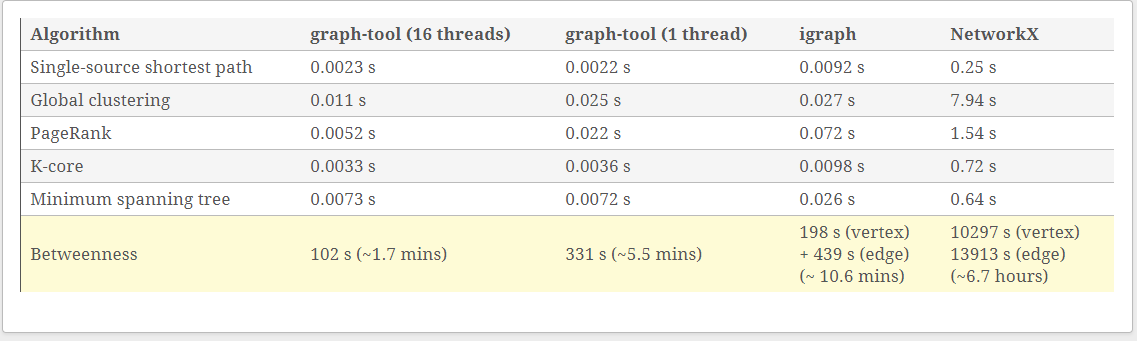

In [1]:
from IPython.display import Image
Image(filename='libraries_comparison.PNG') 

Before discussing the functionalities of NetworkX (despite is not the faster one, NetworkX is the library with more complete documentation, which is essential for a beginner) I will first give you an insight into how these libraries work, what they do when you use one of their algorithm.

### Installation of NetworkX

with can use pip to install and upgrade packages. Just type on the shell

pip install networkx

or, for upgrading

pip install --upgrade networkx

## From the edge-list to a network

In [2]:
#First thing to do: import the libraries§
import matplotlib.pyplot as plt
import numpy as np
import powerlaw
import networkx as nx
import time
import pandas as pd

In [3]:
#path of the edge list
path_file='BA_model.txt'
edge_list=pd.read_csv('BA_model.txt', delimiter = ' ' ,names=['source','target'])

In [4]:
edge_list[:10]

,source,target
0,0,5
1,0,6
2,0,15
3,0,72
4,0,92
5,0,162
6,0,249
7,0,258
8,0,290
9,0,292


In [5]:
#Initializate an empty Graph
G=nx.Graph()

In [6]:
#add nodes
#let us consider the first 10 raws of the edge_list
nodes=[0,5, 6, 15, 72, 92, 162, 249, 258, 290, 292]
G.add_nodes_from(nodes)

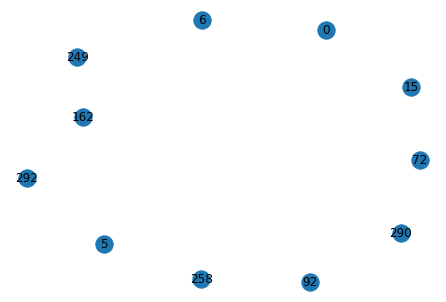

In [7]:
nx.draw(G,with_labels=True)

In [8]:
nx.nodes(G)

NodeView((0, 5, 6, 15, 72, 92, 162, 249, 258, 290, 292))

in order to iterate over a pandas dataframe, you can use:

**iterrows()**

which returns to each line of the dataframe

In [9]:
for _tuple in edge_list[:10].iterrows():
    break
_tuple

(0,
 source    0
 target    5
 Name: 0, dtype: int64)

In [10]:
#add the edges
for _tuple in edge_list[:10].iterrows():
    #print(_tuple[1].source,_tuple[1].target)
    G.add_edge(_tuple[1].source,_tuple[1].target)

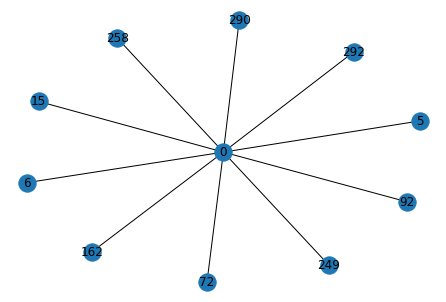

In [11]:
nx.draw(G,with_labels=True)

In the example before we just consider the first 10 raws of the edgelist. 

In order to get the complete graph we can either repeat the previous steps by considering the entire edge-list
or we can use a built-in function of Networkx:

**G = nx.read_edgelist("test.edgelist")**

In [12]:
start=time.time()
G = nx.read_edgelist(path_file)
print(time.time()-start)

0.1363074779510498


In [13]:
#add the edges
G1=nx.Graph()
start=time.time()
for _tuple in edge_list.iterrows():
    #print(_tuple[1].source,_tuple[1].target)
    G1.add_edge(_tuple[1].source,_tuple[1].target)
print(time.time()-start)

3.8965272903442383


a naive approach is $\sim$ 25 times slower than an already existing implementation

In [14]:
# to visualize the nodes' names
list(nx.nodes(G))[:10]

['0', '5', '6', '15', '72', '92', '162', '249', '258', '290']

### Graph operations

**subgraph(G, nbunch)** - induce subgraph of $G$ on nodes in nbunch  
**union(G1,G2)** - graph union  
**disjoint_union(G1,G2)** - graph union assuming all nodes are different  
**cartesian_product(G1,G2)** - return Cartesian product graph  
**compose(G1,G2)** - combine graphs identifying nodes common to both  
**complement(G)** - graph complement  
**create_empty_copy(G)** - return an empty copy of the same graph class    
**convert_to_undirected(G)** - return an undirected representation of $G$  
**convert_to_directed(G)** - return a directed representation of $G$

Imagine we want to select a portion of the graph (a subgraph), i.e. some nodes and the connections among them. 

A naive approach would look like:

a)select the nodes we are interesting in an put them in a list

b)select the lines in the edge-list where both source and target belong the list

otherwise...

In [15]:
H=G.subgraph(nodes)

In [16]:
nx.nodes(H)  

NodeView(())

Why? what's going on?

In [17]:
nodes

[0, 5, 6, 15, 72, 92, 162, 249, 258, 290, 292]

In [18]:
H=G.subgraph([str(i) for i in nodes])
nx.nodes(H)  

NodeView(('6', '162', '5', '0', '72', '15', '258', '92', '290', '292', '249'))

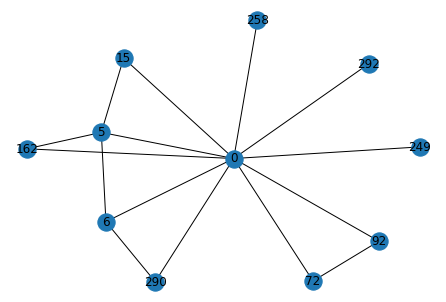

In [19]:
nx.draw(H,with_labels=True)

why do we get more links than before? check check and check


If you need all the lines of the edge list with a particular value of the source you can simply type:

**edge_list[edge_list.source==X]**

and it will return to the lines which satisfy the inner condition.

You can also use composite conditions.

In [20]:
checks=[(92,72),(290,6),(6,5),(5,162),(15,5)]
for i in checks:
    temp=edge_list[(edge_list.source==i[0]) &  (edge_list.target==i[1])]
    if len(temp)>0:
        print('we got',i)

we got (5, 162)


Why we did not find all the connections?

In [21]:
checks=[(92,72),(290,6),(6,5),(5,162),(15,5)]
for i in checks:
    temp=edge_list[(edge_list.source==i[0]) &  (edge_list.target==i[1])]
    if len(temp)>0:
        print('we got',i)
    else:
        temp=edge_list[(edge_list.source==i[1]) &  (edge_list.target==i[0])]
        print('we got',i)

we got (92, 72)
we got (290, 6)
we got (6, 5)
we got (5, 162)
we got (15, 5)


Directed vs Undirected: in the case of undirected networks all the sources are targets and vice-versa. So if you are looking for a particular link better to check in both direction.  

## The degree distribution: P(k)

In order to compute the degree distribution of a netowrk we need to:

a) compute its **degree sequence**

b) compute the **frequency** for each values of k in the degree sequence

c) **normalize** the frequency to the total count.

### a)

In [22]:
#here we look for the degree of each node.
#we use a dictionary
start=time.time()
degrees={}
for i in edge_list.iterrows():
    if i[1].source not in degrees:
        degrees[i[1].source]=0
    if i[1].target not in degrees:
        degrees[i[1].target]=0
    degrees[i[1].source]+=1
    degrees[i[1].target]+=1
print(time.time()-start)

4.586623907089233


In [23]:
degree_sequence=list(degrees.values())

### what do I get if I sum up over all the element in degrees?

a)E: number of edges

b)2E: twice the number of edges

c)4E: four times the number of egdes

We can get the total number of links in the network using the

**number_of_edges()**

function

In [24]:
print(G.number_of_edges())

49975


In [25]:
print(np.sum(degree_sequence))

99950


In [26]:
np.sum(degree_sequence)==2*G.number_of_edges()

True

b)2E: twice the number of edges. 

**degree sum formula**  (also sometimes called the handshaking lemma)

 $\sum_i k_i$=2|E|

In [27]:
#Using networkX
start=time.time()
degree_sequence_nx=[d for n,d in G.degree()]
print(time.time()-start)

0.003920078277587891


### b)
Using an histogram we can compute the degree frequency

In [28]:
bins=np.arange(0.5,max(np.unique(list(degrees.keys()))),1)

In [29]:
c=1
for i,_ in enumerate(bins):
    if c <= 10:
        print(bins[i],'-->',bins[i+1])
        c+=1

0.5 --> 1.5
1.5 --> 2.5
2.5 --> 3.5
3.5 --> 4.5
4.5 --> 5.5
5.5 --> 6.5
6.5 --> 7.5
7.5 --> 8.5
8.5 --> 9.5
9.5 --> 10.5


In [30]:
counts, bins=np.histogram(degree_sequence,bins=bins)
counts_nx, bins=np.histogram(degree_sequence_nx,bins=bins)
#we use the center of the bin as x for the frequency
x=(bins[1:]-bins[:-1])/2 +bins[:-1]

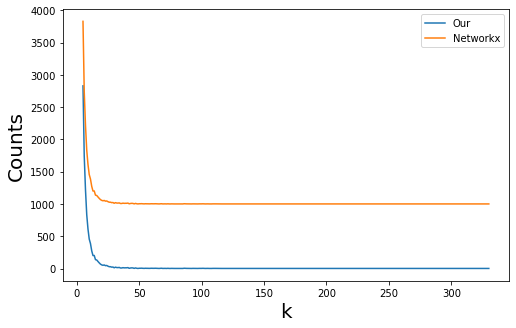

In [31]:
plt.figure(figsize=(8,5))
plt.plot(x[counts!=0],counts[counts!=0],label='Our')
plt.plot(x[counts_nx!=0],counts_nx[counts_nx!=0]+1000,label='Networkx')
#plt.plot(x[counts_nx!=0],counts_nx[counts_nx!=0],label='Networkx')
plt.ylabel('Counts', fontsize=20)
plt.xlabel('k',fontsize=20)
plt.legend()
plt.show()

#### Why should we use a library if we can write a code that does the same tasks?

1) We do not need to start from the wheel every time we need something

2) Libraries are in general optimized. The same optimization will require to you several days of work.

#### but...

always go a look to the implementation of the algorithm you are using. Never use open source libraries as a black box.

### c)
normalize the count in each bin by the total counts. 

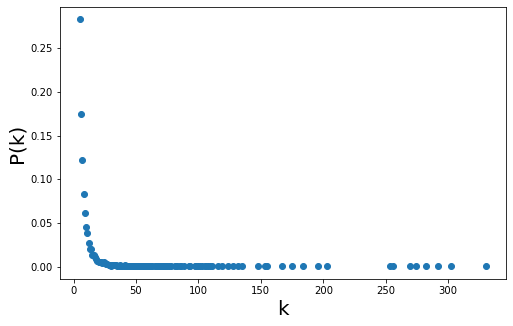

In [32]:
plt.figure(figsize=(8,5))
plt.plot(x[counts!=0],counts[counts!=0]/sum(counts[counts!=0]),'o')
plt.ylabel('P(k)', fontsize=20)
plt.xlabel('k',fontsize=20)

plt.show()

### What kind of distribution is the one above?
$ p(k) \sim C * ? $

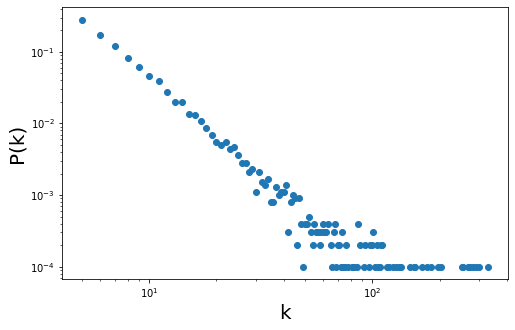

In [33]:
plt.figure(figsize=(8,5))
plt.loglog(x[counts!=0],counts[counts!=0]/sum(counts[counts!=0]),'o')
plt.ylabel('P(k)', fontsize=20)
plt.xlabel('k',fontsize=20)

plt.show()

Notice that because the degree of a node is by definition an integer,
you can also use an internal function of numpy
to compute the degree distribution, that is:

**np.unique()**

In [34]:
xx,countss=np.unique(degree_sequence,return_counts=True)

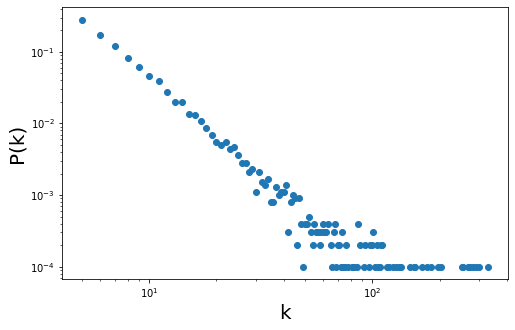

In [35]:
plt.figure(figsize=(8,5))
plt.loglog(xx,countss/sum(countss),'o')
plt.ylabel('P(k)', fontsize=20)
plt.xlabel('k',fontsize=20)

plt.show()

### From synthetic networks to real-world networks

Empirical netowrks are in general scale-free between a $k_{min}$ and a $k_{max}$.

$p(k) =(\gamma -1)/(k_{min}) * (k/k_{min})^{-\gamma}$

In order to completely define the distribution we need to find the two parameters $\gamma$ and $k_{min}$ that better fit the power-law.


The **the scaling parameter** can be computed using the **method of maximum likelihood**:

$\hat\gamma =1+ N* \left[\sum_{i=1}^N \ln(k_i/k_min )\right]^{-1}$ 

$\sigma = (\hat\gamma -1) / \sqrt N$


How can we estimate the value of $k_{min}?$

We can use **Kolmogorov-Smirnov** or KS statistic, which is simply the maximum distance between the CDFs of the
data and the fitted model:

$D = max_{k\geq k_{min}}|S(x) +P(x)|$

Here $S(x)$ is the CDF of the data for the observations, and $P(x)$ is the CDF for the power-law model that best fits the data in the region $k \geq K_{min}$. Our estimate $k_{min}$ is then the value that minimizes $D$.

#### The final recipe:

For $k_{min}$ in KMIN_RANGE: 

a) Find $\hat\gamma$ 

b) Compute D

c) store values of $k_{min}$, $\hat\gamma$,D

d) Repeat for each value in KMIN_RANGE

e) Select the lowest value of $\hat D$ --> $k_{min}$, $\hat\gamma$


(see https://arxiv.org/pdf/0706.1062.pdf)

The library **powerlaw** does everything for us:

In [36]:
##cal the function: input the degree sequence
fit = powerlaw.Fit(degree_sequence_nx, discrete=True)
alpha=fit.alpha
print('scaling expoenent',alpha)
k_min=fit.xmin
print('k_min',k_min)

scaling expoenent 2.877304526763097
k_min 10.0


Calculating best minimal value for power law fit
/home/ec2-user/anaconda3/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/home/ec2-user/anaconda3/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /


The **goodness-of-fit** test generates a p-value that quantifies the plausibility of the hypothesis:

Startin from $\hat D$:

1)generate a large number of power-law distributed synthetic data sets with scaling parameter $\hat\gamma$ and $k_{min}$

2)fit each synthetic data set individually to its own power-law model and calculate the KS statistic for each one relative to its own model

3)count what fraction of the time the resulting statistic is larger than the value for the empirical data. This
fraction is our p-value

# Homework:

1) select a network from the web.
Source:

-->https://hmakse.ccny.cuny.edu/

-->https://west.uni-koblenz.de/konect

-->https://icon.colorado.edu/

-->https://snap.stanford.edu/data/

2) Compute its degree distribution, cumulative degree distribution, 
$k_{min}$ and $\hat\gamma$, gof and p
   



## Scale-free or heavy-tailed?

One of the most interesting feature of many-real world networks is their degree distribution.

**However, is still open the debate on whether the degree distribution of many real-world networks is scale-free**

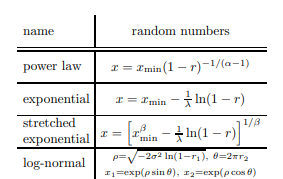

In [37]:
Image(filename='heavy.PNG') 

In [38]:
mu, sigma = 2., 1.5 # mean and standard deviation
s = np.random.lognormal(mu, sigma, 10001)
counts_l, bins=np.histogram(s,bins=bins)
x=(bins[1:]-bins[:-1])/2 +bins[:-1]

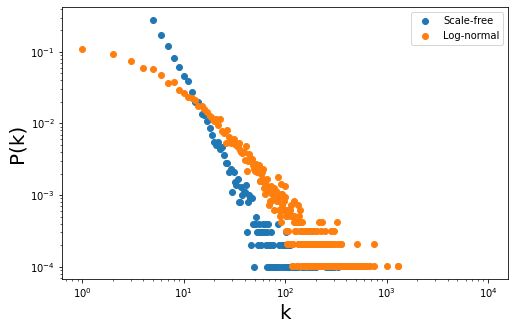

In [39]:
plt.figure(figsize=(8,5))
plt.loglog(x[counts!=0],counts[counts!=0]/sum(counts),'o',label='Scale-free')
plt.loglog(x,counts_l/sum(counts_l),'o',label='Log-normal')
plt.ylabel('P(k)', fontsize=20)
plt.xlabel('k',fontsize=20)

plt.legend()
plt.show()

#### What happens if we increase  $\sigma$ ?

### How can we differentiate between a power-law and another heavy-tailed distribution when we see one?

The **likelihood ratio test**:

The basic idea behind the likelihood ratio test is to compute the likelihood of
the data under two competing distributions. The one with the higher likelihood is
then the better fit. Alternatively one can calculate the ratio of the two likelihoods, or
equivalently the logarithm $R$ of the ratio, which is positive or negative depending on
which distribution is better, or zero in the event of a tie.

$R=\sum_i \ln p_1(k_i)-\ln p_2(k_i)$


**but**

$R_1$=+0.001

$R_2$=-0.001

Because of fluctuations $R_1$ can go in $R_2$ and vice-versa. The sign of the log likelihood ratio alone, however, will not definitively indicate which model is the better fit. We need a log likelihood ratio that is sufficiently positive or negative. To make a quantitative judgment about whether the observed value of R is sufficiently far from zero, we need to know the size of the expected fluctuations, i.e., we need to know the standard deviation $σ$ on $R$:

$\sigma^2 =1/N \sum_i\left[(l_i^1-l_i^2) - (\bar l_i^1-\bar l_i^2) \right]^2$

and $l_i^j=\ln p_j(k_i) $

Alternatively, we can compute a p-value as:

$p=|ercf(R/\sqrt{2n}σ)|$ with ercf e complementary Gaussian error function.

Do not worry, you do not have to do everything by yourself, powerlaw help us!!

In [40]:
fit = powerlaw.Fit(degree_sequence_nx, discrete=True)
R, p = fit.distribution_compare('power_law', 'lognormal_positive')

Calculating best minimal value for power law fit
/home/ec2-user/anaconda3/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/home/ec2-user/anaconda3/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /


In [41]:
print(R)

21.181503555968426


If p is small (say p < 0.1) then our value for $R$ is unlikely to be a chance result and hence its sign can probably be trusted as an indicator of which model is the better fit to the data. (It does not however mean that
#the model is a good fit, only that it is better than the alternative.)


In [42]:
print(p)

0.003516746883759155


## Using a stochastic graph generator


We can use built-in functions to generate some of the most commons
synthetic networks:


**erdos_renyi_graph()** Erdős–Rényi model--> $P(k) \sim $ binomial(N,p)

https://networkx.org/documentation/networkx-1.9/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html

**watts_strogatz_graph()** Watts–Strogatz model:  $P(k) \sim $ delta_Dirac(N,$\beta$)

https://networkx.org/documentation/networkx-1.9/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html

**barabasi_albert_graph** Barabási–Albert model:  $P(k) \sim $power_law(N,$\gamma$)

https://networkx.org/documentation/networkx-1.9/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html#networkx.generators.random_graphs.barabasi_albert_graph

In [43]:
N=1000
##
p=0.15
er=nx.erdos_renyi_graph(N,p)
##
K=20
beta=0.5
ws=nx.watts_strogatz_graph(N,K,beta)
##
m=3
ba=nx.barabasi_albert_graph(N,m)

In [44]:
er_degree_sequence=[d for n,d in er.degree()]
ws_degree_sequence=[d for n,d in ws.degree()]
ba_degree_sequence=[d for n,d in ba.degree()]
bins=np.arange(0.5,N,1) 

counts_er, bins=np.histogram(er_degree_sequence,bins=bins)
counts_ws, bins=np.histogram(ws_degree_sequence,bins=bins)
counts_ba, bins=np.histogram(ba_degree_sequence,bins=bins)

x=(bins[1:]-bins[:-1])/2 +bins[:-1]

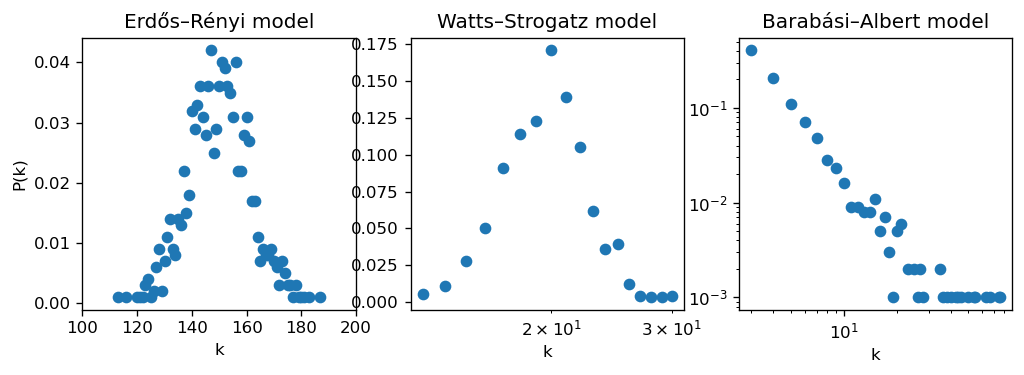

In [45]:
plt.figure(figsize=(10,3), dpi=120) # 10 is width, 4 is height

# Left hand side plot
plt.subplot(1,3,1)  # (nRows, nColumns, axes number to plot)
plt.plot(x[counts_er!=0],counts_er[counts_er!=0]/sum(counts_er),'o')
plt.ylabel('P(k)', fontsize=10)
plt.xlabel('k',fontsize=10)
plt.xlim([100,200])
plt.title('Erdős–Rényi model')

# Right hand side plot
plt.subplot(1,3,2)
plt.plot(x[counts_ws!=0],counts_ws[counts_ws!=0]/sum(counts_ws),'o')
plt.xscale('log')
plt.xlabel('k',fontsize=10)

plt.title('Watts–Strogatz model')

# Right hand side plot
plt.subplot(1,3,3)
plt.loglog(x[counts_ba!=0],counts_ba[counts_ba!=0]/sum(counts_ba),'o')
plt.xlabel('k',fontsize=10)
plt.title('Barabási–Albert model')

plt.show()

## The small-world property

Let us define L as the average short path in a network. 

L $\propto $ logN

In networkX we can compute the average short path length of a netowork with the following function:

**average_shortest_path_length(G)**

https://networkx.org/documentation/networkx-1.9/reference/generated/networkx.algorithms.shortest_paths.generic.average_shortest_path_length.html#networkx.algorithms.shortest_paths.generic.average_shortest_path_length

In [50]:
Lws,Ler,Lba=[],[],[]
for N in np.arange(500,5000,500):
    Lws.append(nx.average_shortest_path_length(nx.watts_strogatz_graph(N,4,0.6)))
    Ler.append(nx.average_shortest_path_length(nx.erdos_renyi_graph(N,p)))
    Lba.append(nx.average_shortest_path_length(nx.barabasi_albert_graph(N,m)))

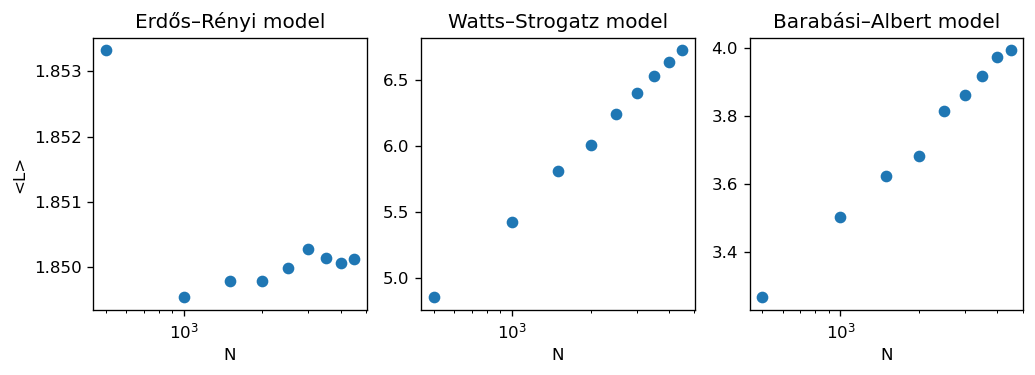

In [53]:
plt.figure(figsize=(10,3), dpi=120) # 10 is width, 4 is height

# Left hand side plot
plt.subplot(1,3,1)  # (nRows, nColumns, axes number to plot)
plt.plot(np.arange(500,5000,500),Ler,'o')
plt.xscale('log')
plt.ylabel('<L>', fontsize=10)
plt.xlabel('N',fontsize=10)
plt.title('Erdős–Rényi model')

# Right hand side plot
plt.subplot(1,3,2)
plt.plot(np.arange(500,5000,500),Lws,'o')
plt.xscale('log')
plt.xlabel('N',fontsize=10)
plt.title('Watts–Strogatz model')

# Right hand side plot
plt.subplot(1,3,3)
plt.plot( np.arange(500,5000,500),Lba,'o')
plt.xlabel('k',fontsize=10)
plt.xscale('log')
plt.xlabel('N',fontsize=10)
plt.title('Barabási–Albert model')

plt.show()

### The clustering coefficient

We can compute the clustering coefficient of each node in  a network using the built-in function:

**nx.clustering()**

https://networkx.org/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.cluster.clustering.html



In [56]:
nodes_clustering_coefficent=nx.clustering(ws)

Text(0.5, 1.0, 'Watts–Strogatz model')

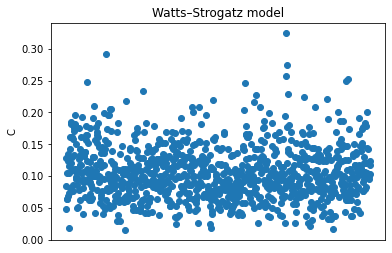

In [74]:
plt.plot(list(nodes_clustering_coefficent.values()),'o')
plt.ylabel('C', fontsize=10)
plt.xticks([])
plt.title('Watts–Strogatz model')

In [75]:
np.mean(list(nodes_clustering_coefficent.values()))

0.10584310811805506

We can compute the average clustering coefficient of a network directly by using:


**nx.average_clustering()**

https://networkx.org/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.approximation.clustering_coefficient.average_clustering.html#networkx.algorithms.approximation.clustering_coefficient.average_clustering

In [76]:
nx.average_clustering(ws)

0.10584310811805542

### The Watts–Strogatz model: between regular lattice (ring) and and ER network

In [77]:
k=10
N=1000
C,L=[],[]
beta_values=np.logspace(np.log10(0.0001),np.log10(1.0), 14)
for beta in beta_values:
    c,l=[],[]
    for _ in np.arange(10):
        c.append(nx.average_clustering(nx.watts_strogatz_graph(N,k,beta)))
        l.append(nx.average_shortest_path_length(nx.watts_strogatz_graph(N,k,beta)))
    C.append(np.mean(c))
    L.append(np.mean(l))

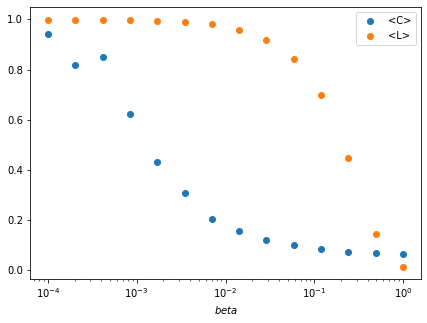

In [78]:
plt.figure(figsize=(7,5))
c0=nx.average_clustering(nx.watts_strogatz_graph(N,k,0))
l0=nx.average_shortest_path_length(nx.watts_strogatz_graph(N,k,0))
plt.plot( beta_values,np.divide(L,l0),'o',label='<C>')
plt.plot( beta_values,np.divide(C,c0),'o',label='<L>')
plt.xscale('log')

plt.xlabel('$beta$',fontsize=10)

plt.legend()

plt.show()